In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [3]:
df = pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.shape

(506, 14)

In [9]:
df.duplicated().sum()

0

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
corr_matrix=df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


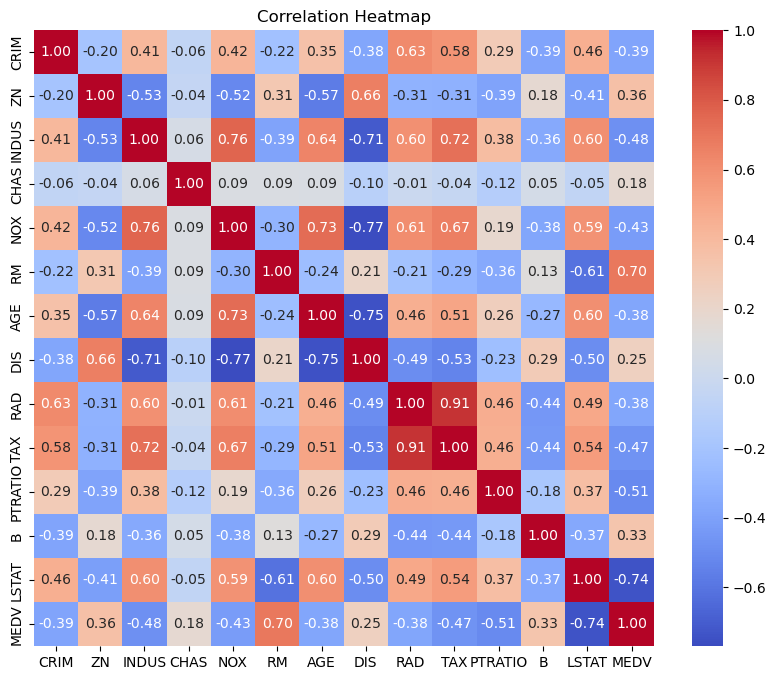

In [15]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [17]:
#Extract features (x) and target (y)
x=df[['RM','LSTAT']].values #convert to numpy array
y=df['MEDV'].values #convert to numpy array

In [19]:
# Initialize scalers
scaler_x=StandardScaler()
scaler_y=StandardScaler()
# scale x and y
x_scaled =scaler_x.fit_transform(x)
y_scaled=scaler_y.fit_transform(y.reshape(-1,1)).flatten() #Flatten to 1D

In [21]:
class MultipleLinearRegression:
    def __init__(self):
        """
        Initializes the MultipleLinearRegression model.
        
        Attributes:
        -----------
        B : numpy array
            Coefficients vector (includes intercept as B[0])
        MSE : float
            Mean Squared Error of the model.
        R_squared : float
            Coefficient of determination.
        """
        self.B = None
        self.MSE = None
        self.MSR = None
        self.R_squared = None
        self.n_samples = None
        self.n_features = None
        self.SSE = None
        self.SSR = None
        self.SST = None
        self.dof_MSR = None
        self.dof_MSE = None
        self.dof_total = None
        self.F_node = None

    def fit(self, X, y):
        """
        Fits the model using the least squares method.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Feature matrix.
        y : array-like, shape (n_samples,)
            Target values.
        """
        X = np.array(X)
        y = np.array(y)
        self.n_samples = X.shape[0]
        
        # Add intercept (bias) term: column of ones
        X_design = np.c_[np.ones(self.n_samples), X]

        # Calculate coefficients: B = (X^T X)^(-1) X^T y
        self.XTX_inv = np.linalg.inv(X_design.T @ X_design)
        self.B = self.XTX_inv @ X_design.T @ y
        
        # Predict values
        y_pred = self.predict(X)

        #setting the degrees of freedoms  
        self.dof_MSR = 1
        self.dof_MSE = self.n_samples - 2    
        self.dof_total = self.n_samples - 1

        # Evaluation
        residuals = y - y_pred
        self.SSE = np.sum(residuals**2)
        self.SST = np.sum((y - y.mean())**2)
        self.SSR = np.sum((y_pred - y.mean())**2)
        self.R_squared = self.SSR / self.SST

        self.MSE = self.SSE/self.dof_MSE
        self.MSR = self.SSR/self.dof_MSR

    def predict(self, X):
        """
        Predicts target values for given input data.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
        
        Returns:
        --------
        y_pred : array-like, predicted values
        """
        if self.B is None:
            raise ValueError("The model has not been fitted yet.")

        X = np.array(X)
        n_samples = X.shape[0]
        X_design = np.c_[np.ones(n_samples), X]  # Add intercept
        return np.dot(X_design ,self.B)
    
    def plot(self, x, y):
        """
        plots the scatter plot of the data points and the regression plane.
        
        Parameters:
        -----------
        X : array-like
            The input features matrix (must be 2D with exactly two features for visualization)
        Y : array-like
            The target varibles array.
        """
        if self.B is None:
            raise ValueError("The model has not been fitted yet.")
        # Ensure x and y are numpy arrays
        x = np.array(x)
        y = np.array(y) 
        # check if we can visualize (only works with 2 features)
        if x.shape[1] != 2:
            raise ValueError("plotting is only available for models with exactly two independent variables.")
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x[:, 0], x[:, 1], y, color='r', label='Data Points')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Charges')
        ax.plot_trisurf(x[:, 0], x[:, 1], self.predict(x), color='b', alpha=0.5)
        plt.show()

In [23]:
class SimpleLinearRegression:
    def __init__(self):
        """ 
        B_0 : The intercept of the regression line (float)
        B_1 : The slope of the regression line (float)
        MSE : Mean squared error (float) 
        """
        self.B_0 = None
        self.B_1 = None
        self.MSE = None

    def fit(self, x , y):
        """ 
        Fits the simple linear regression model to the training data 
        Calculates B_0 and B_1 
        x : The input feature array
        y : The target variable array 
        """
        self.n_sample = len(x)
        self.x = np.array(x)
        self.y = np.array(y)

        self.x_bar = x.mean()
        y_bar = y.mean()

        self.SXX = sum(x**2) - self.n_sample * self.x_bar**2
        SXY = sum(x * y) - self.n_sample * self.x_bar * y_bar

        self.B_1 = SXY / self.SXX
        self.B_0 = y_bar - self.B_1 * self.x_bar

        y_hat = self.predict(x)
        e = y - y_hat

        self.SSE = sum(e**2)
        self.SST = sum((y - y_bar)**2)
        self.SSR = sum((y_hat - y_bar)**2)

        self.dof_MSR = 1
        self.dof_MSE = self.n_sample - 2    
        self.dof_total = self.n_sample - 1
        
        self.MSE = self.SSE / self.dof_MSE
        self.MSR = self.SSR / self.dof_MSR

    def predict(self, x):
        """ 
        Predicts the target variable for new input values using the fitted model 
        """
        if self.B_0 is None or self.B_1 is None:
            raise ValueError('The model has not been fitted yet')
        x = np.array(x)
        return self.B_0 + self.B_1 * x

    def anova_table(self):
        """
        Returns the ANOVA table for the fitted model.

        Returns:
        --------
        anova_df : pandas DataFrame
        ANOVA table with columns: 'Source', 'SS', 'df', 'MS', 'F'
        """
        if self.B_0 is None or self.B_1 is None:
            raise ValueError("The model has not been fitted yet.")

        # Calculating F-statistic
        self.F_node = self.MSR / self.MSE

        # Constructing the ANOVA table
        anova_components = {
            'Source': ["Regression", "Error", "Total"],
            'Sum Of Squares': [self.SSR, self.SSE, self.SST],
            'Degrees Of Freedom': [self.dof_MSR, self.dof_MSE, self.dof_total],
            'Mean Of Squares': [self.MSR, self.MSE, np.nan],
            'F-statistic': [self.F_node, np.nan, np.nan]
        }
        anova_df = pd.DataFrame(anova_components)
        return anova_df

    def hypothesis_test(self, alpha=0.05):
        """
        Perform a hypothesis test to determine if there is a relationship between 
        the independent variable (x) and the dependent variable (y) based on the F-statistic

        alpha : float
            The significance level for the test. Default value = 0.05

        The null hypothesis (H_0) assumes that there is no relationship between x and y,
        while the alternative hypothesis (H_a) suggests that there is a relationship between x and y
        """
        F_c = scipy.stats.f.ppf(1 - alpha, self.dof_MSR, self.dof_MSE)

        if self.F_node > F_c:
            conclusion = "Since F_node > F_c, we reject the null hypothesis: there is a relationship between x and y."
        else:
            conclusion = "Since F_node < F_c, we fail to reject the null hypothesis: there is no relationship between x and y."

        print('Result of hypothesis testing')
        print('Null Hypothesis (H_0): B_1 = 0\n')
        print('Alternative Hypothesis (H_a): B_1 ≠ 0\n')
        print('###########################################################\n')
        print('F-statistic (F_0):\n', self.F_node, '\n')
        print('F-Critical (F_c):\n', F_c, '\n')
        print(conclusion)

    def interval_estimation(self, alpha=0.05, sigma=None):
        """
        Interval estimation provides a range for regression coefficients

        alpha : float
            The significance level for the test. Default value = 0.05

        sigma : float or None
            If sigma is not provided, t-distribution is used
        """
        if sigma is None:
            t = scipy.stats.t.ppf(1 - (alpha / 2), self.dof_MSE)
            B_0lower = self.B_0 - t * np.sqrt(self.MSE * ((1 / self.n_sample) + (self.x_bar ** 2 / self.SXX)))
            B_0upper = self.B_0 + t * np.sqrt(self.MSE * ((1 / self.n_sample) + (self.x_bar ** 2 / self.SXX)))
            B_1lower = self.B_1 - t * np.sqrt(self.MSE / self.SXX)
            B_1upper = self.B_1 + t * np.sqrt(self.MSE / self.SXX)
        else:
            z = scipy.stats.norm.ppf(1 - (alpha / 2))
            B_0lower = self.B_0 - z * sigma * np.sqrt((1 / self.n_sample) + (self.x_bar ** 2 / self.SXX))
            B_0upper = self.B_0 + z * sigma * np.sqrt((1 / self.n_sample) + (self.x_bar ** 2 / self.SXX))
            B_1lower = self.B_1 - z * sigma * np.sqrt(1 / self.SXX)
            B_1upper = self.B_1 + z * sigma * np.sqrt(1 / self.SXX)

        return (
            'The range of B_0:', [B_0lower, B_0upper], 'The range of B_1:', [B_1lower, B_1upper])


In [25]:
# train the model
model=MultipleLinearRegression()
model.fit(x_scaled,y_scaled)

In [27]:
# Make predictions on the training set
y_pred_scaled=model.predict(x_scaled)
# convert predictins back to the original scale
y_pred=scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()

In [29]:
df['predicted_MEDV']=y_pred
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,predicted_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,28.941014
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,25.484206
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,32.659075
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,32.406520
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,31.630407


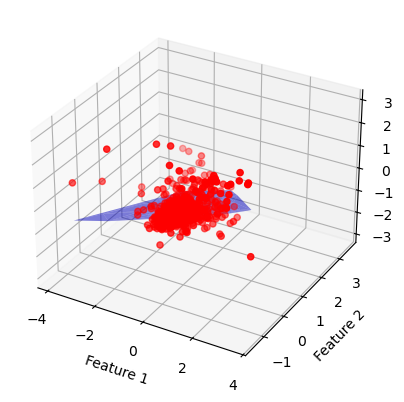

In [31]:
model.plot(x_scaled,y_scaled)

In [33]:
x_sim = df['RM'].values
y_sim = df['MEDV'].values

In [35]:
scalerX = StandardScaler()
scalerY = StandardScaler()

Xscaled = scalerX.fit_transform(x_sim.reshape(-1,1)).flatten()
Yscaled = scalerY.fit_transform(y_sim.reshape(-1,1)).flatten()

In [37]:
simpleModel = SimpleLinearRegression()

In [39]:
simpleModel.fit(Xscaled,Yscaled)

In [41]:
ysim_pred_scaled = simpleModel.predict(Xscaled)

ysim_pred = scalerY.inverse_transform(ysim_pred_scaled.reshape(-1,1)).flatten()

In [43]:
simpleModel.anova_table()

,Source,Sum Of Squares,Degrees Of Freedom,Mean Of Squares,F-statistic
0,Regression,244.663881,1,244.663881,471.84674
1,Error,261.336119,504,0.518524,NaN
2,Total,506.000000,505,NaN,NaN


In [45]:
simpleModel.hypothesis_test()

Result of hypothesis testing
Null Hypothesis (H_0): B_1 = 0

Alternative Hypothesis (H_a): B_1 ≠ 0

###########################################################

F-statistic (F_0):
 471.84673987638735 

F-Critical (F_c):
 3.8599753744430494 

Since F_node > F_c, we reject the null hypothesis: there is a relationship between x and y.


In [47]:
simpleModel.interval_estimation()

('The range of B_0:',
 [-0.06289287663439552, 0.06289287663439463],
 'The range of B_1:',
 [0.6324670704371451, 0.7582528237059352])

In [49]:
simpleModel.interval_estimation(0.05,24)

('The range of B_0:',
 [-2.0911446459478404, 2.0911446459478396],
 'The range of B_1:',
 [-1.3957846988762999, 2.78650459301938])